**Objective**: Investigate the reservoir activity. What is the treshold value for $\sigma$ that leads the activity to self-perpetuate. Also investigate the eigenvalues and the spectral radius.

In [26]:
import os
os.chdir(os.path.join(os.getcwd(), "../code"))
import numpy as np
import matplotlib.pyplot as plt
from agent import Reservoir
from config import DATA_PATH
from pathlib import Path

folder = 'reservoirs'
path = Path(DATA_PATH) / folder
path.mkdir(parents=True, exist_ok=True)

TIME_STEPS = 300
BURN_IN_END = 1000
MEAN = 0
NUM_NEURONS = 1000


In [27]:
def plot_activity(sigma_range, reservoirs):
    """
    Creates 3 plots for the network activity.
    """
    plt.rcParams.update({
        "font.size": 16,
    })
    num_columns = len(sigma_range)

    fig, axes = plt.subplots(num_columns, 1, figsize=(8, 3*num_columns), constrained_layout=True)
    axes = axes.flatten() if len(sigma_range) > 1 else [axes]

    for i, sigma in enumerate(sigma_range):
        reservoir = Reservoir(time_steps=TIME_STEPS, num_neurons=NUM_NEURONS, burn_in_time=BURN_IN_END, mean=MEAN, standard_deviation=sigma)
        reservoirs.append(reservoir)
        
        ax = axes[i]
        activity = np.concatenate((reservoir.burn_in_state_matrix[:-1], reservoir.neuron_state_time_matrix), axis=0)
        im = ax.imshow(activity.T, cmap='seismic', aspect='auto', interpolation='nearest', vmin=-1, vmax=1)
        
        if i == len(sigma_range) - 1:
            ax.set_xlabel('Time')
        else:
            ax.tick_params(bottom=False, labelbottom=False)

        ax.set_ylabel('Neuron')
        ax.set_title(f'σ = {sigma}')
        
        burn_in_end = reservoir.burn_in_state_matrix.shape[0]
        label = 'Burn-in End' if i == 0 else None
        ax.scatter(burn_in_end, activity.shape[1] - 0.5 + 20, marker='v', s=30, color='black', zorder=10, clip_on=False, label=label)
        ax.set_ylim(-0.5, activity.shape[1] - 0.5)

    cbar_ax = fig.add_axes([0.1, -0.05, 0.9, 0.03])  # [left, bottom, width, height]
    cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
    cbar.ax.set_xlabel('  Activity', labelpad=10)

    path = Path(DATA_PATH) / folder / 'reservoir_activities'
    path.mkdir(parents=True, exist_ok=True)
    plt.savefig(path / 'combined_reservoirs.pdf', format='pdf', bbox_inches='tight')
    plt.show()

In [28]:
def plot_eigenvalues(sigma_range, reservoirs):
    """
    Creates 3 plots for the corresponding eigenvalues.
    """
    plt.rcParams.update({
        "font.size": 21,
    })

    num_reservoirs = len(reservoirs)
    fig, axes = plt.subplots(1, num_reservoirs, figsize=(8 * num_reservoirs, 8))

    if num_reservoirs == 1:
        axes = [axes]

    max_radius = max(np.max(np.abs(np.linalg.eigvals(r.weight_matrix))) for r in reservoirs)

    for i, reservoir in enumerate(reservoirs):
        eigenvalues, _ = np.linalg.eig(reservoir.weight_matrix)
        spectral_radius = max(abs(eigenvalues))
        
        ax = axes[i]
        ax.scatter(eigenvalues.real, eigenvalues.imag, s=10)
        ax.set_xlabel(r'$\mathrm{Re}(\lambda)$')
        ax.set_title(f'σ = {sigma_range[i]}')
        ax.axhline(0, color='black', lw=0.2, ls='--')
        ax.axvline(0, color='black', lw=0.2, ls='--')

        ax.tick_params(left=False)

        if i != 0:
            ax.set_yticklabels([])
        else:
            ax.set_ylabel(r'$\mathrm{Im}(\lambda)$')
        
        circle = plt.Circle((0, 0), spectral_radius, color='grey', ls='--', fill=False, lw=1)
        ax.add_artist(circle)
        ax.text(0.95, 0.05, f'$\\rho = {spectral_radius:.3f}$', transform=ax.transAxes, ha='right', va='bottom', bbox=dict(boxstyle='round, pad=0.2', fc='white', ec='gray', lw=0.5))
        
        ax.grid(linewidth=0.3)
        ax.set_xlim(-1.1 * max_radius, 1.1 * max_radius)
        ax.set_ylim(-1.1 * max_radius, 1.1 * max_radius)
        ax.set_aspect('equal', adjustable='box')

    plt.tight_layout()
    path = Path(DATA_PATH) / folder / 'eigenvalues'
    path.mkdir(parents=True, exist_ok=True)
    plt.savefig(path / 'all_agents_eigenvalues.pdf', format='pdf', bbox_inches='tight')
    plt.show()

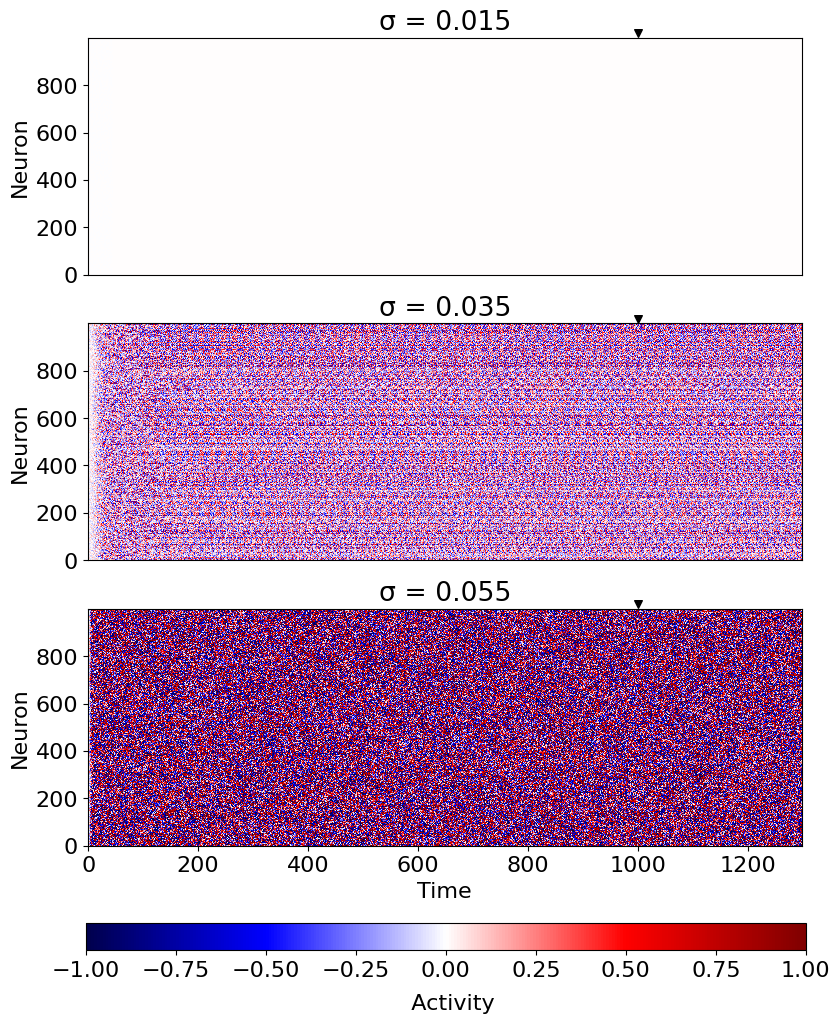

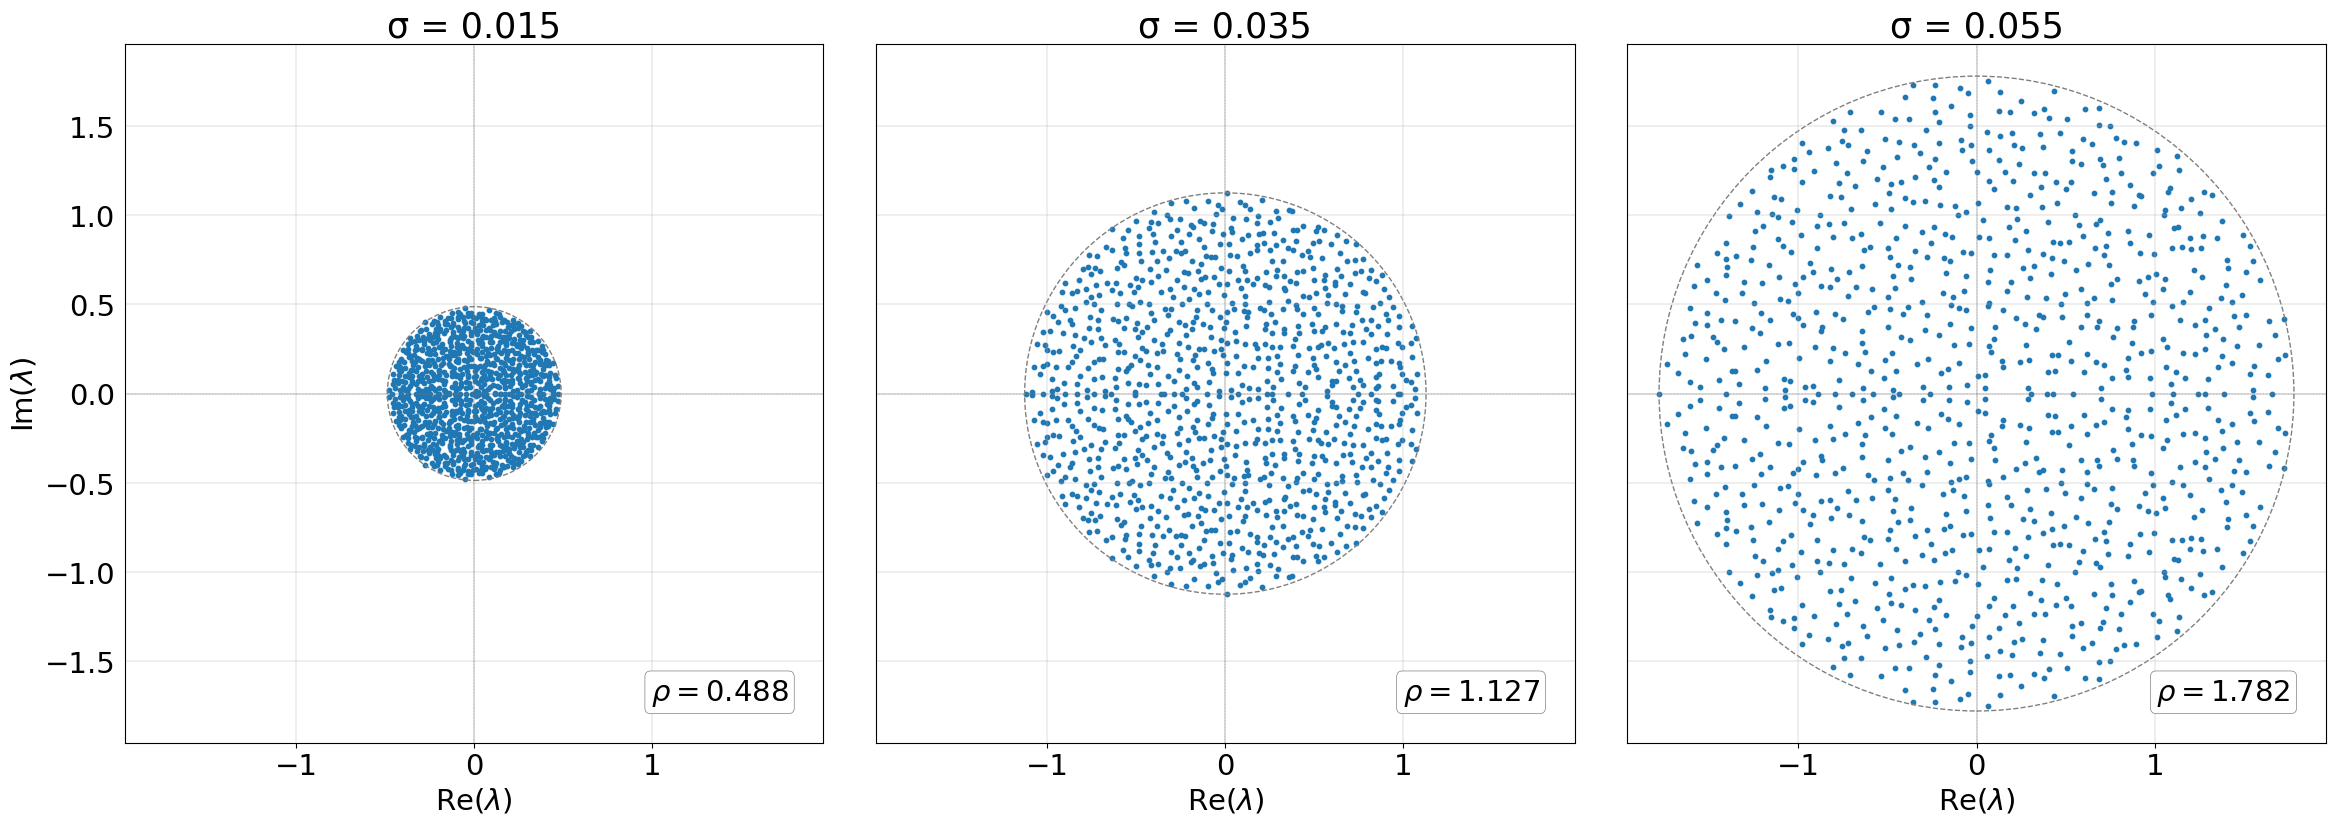

In [29]:
sigma_range = [0.015, 0.035, 0.055]
reservoirs = []
plot_activity(sigma_range, reservoirs)
plot_eigenvalues(sigma_range, reservoirs)

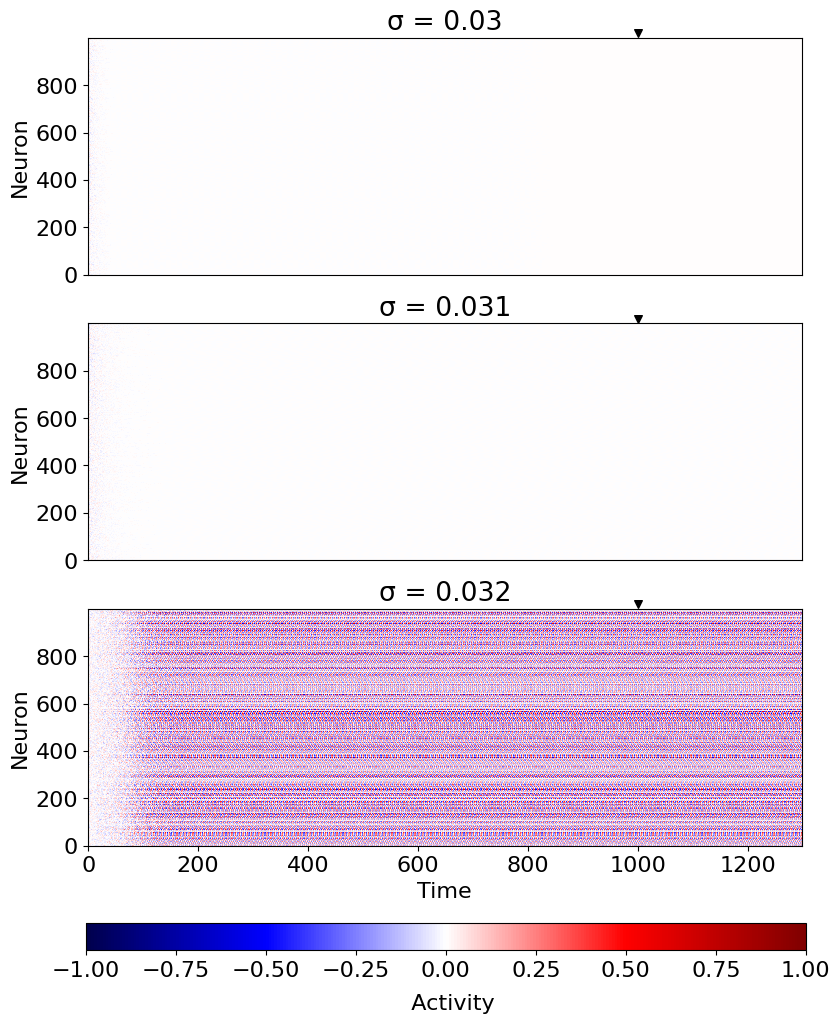

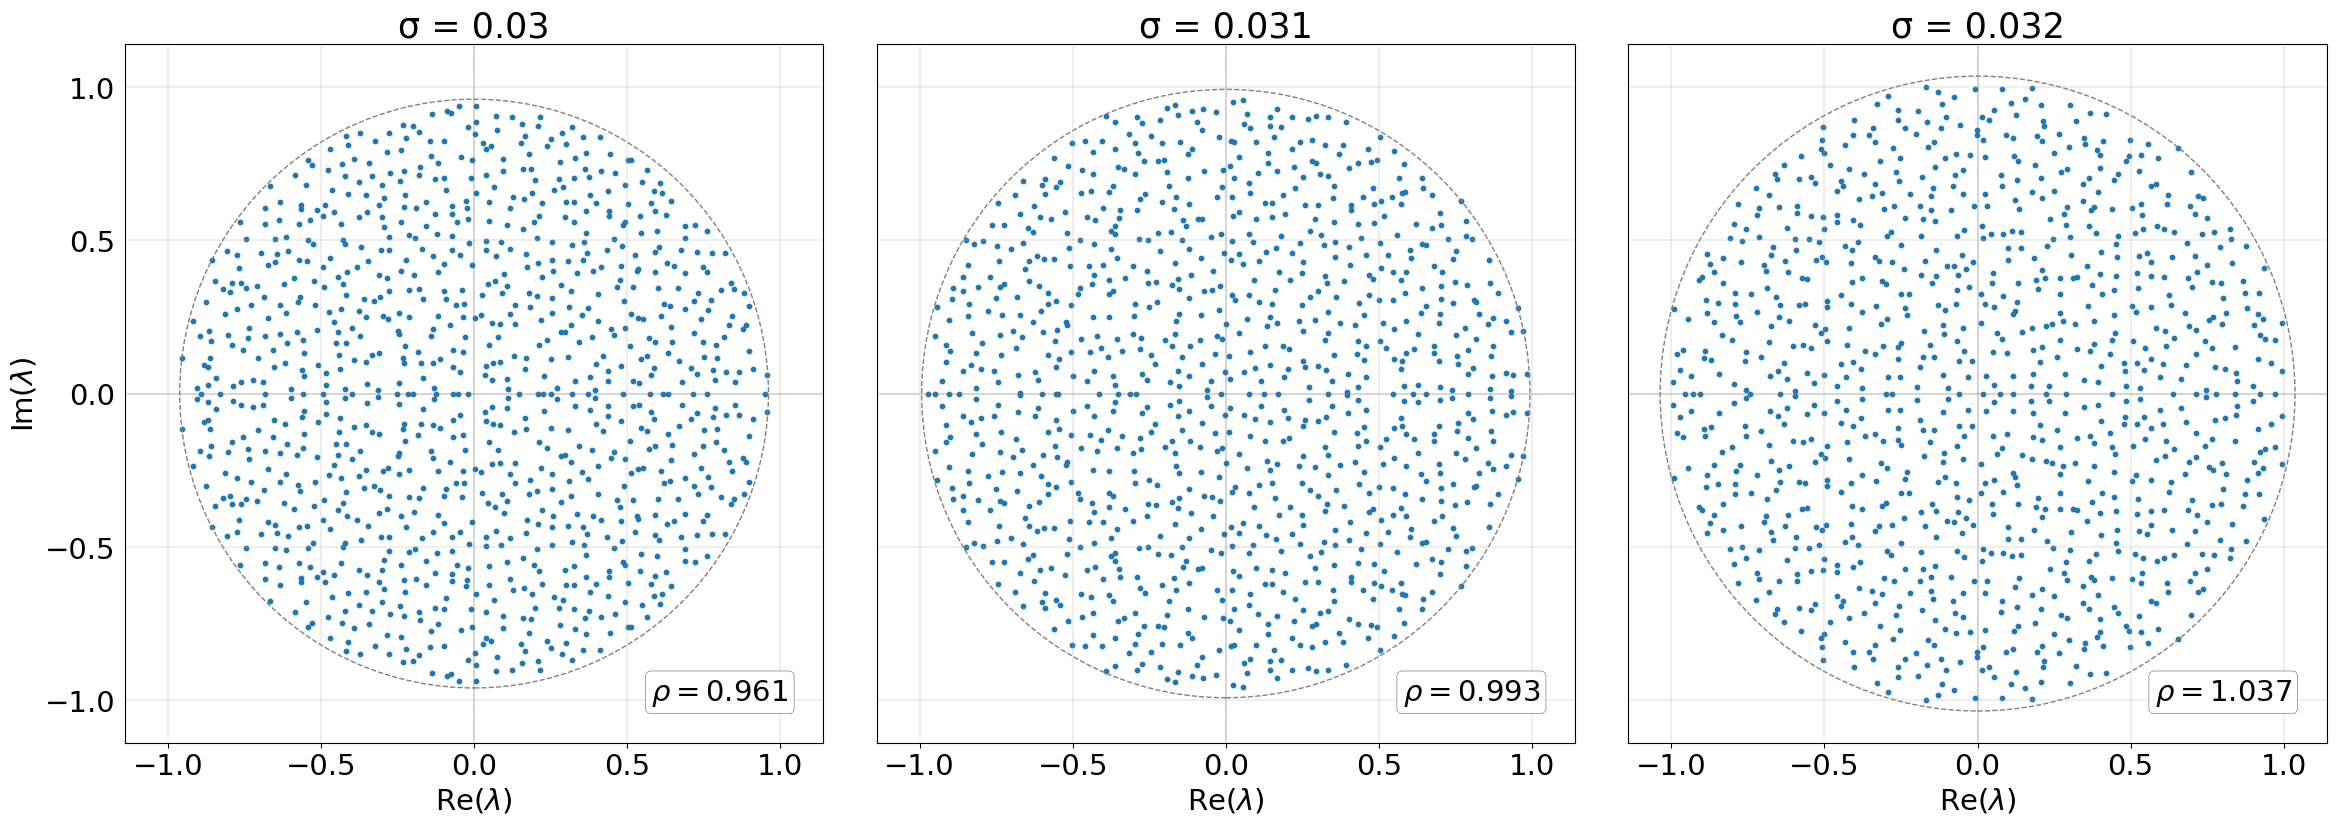

In [32]:
sigma_range = [0.030, 0.031, 0.032]
reservoirs = []
plot_activity(sigma_range, reservoirs)
plot_eigenvalues(sigma_range, reservoirs)